In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '2'
from keras import models
from keras import layers
from keras.applications import VGG16

Using TensorFlow backend.
/data/bitt/wzq/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/bitt/wzq/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data/bitt/wzq/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/data/bitt/wzq

In [2]:
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [3]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [4]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 9,177,089
Non-trainable params: 7,635,264
_________________________________________________________________


In [5]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

In [6]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [7]:
train_datagen = ImageDataGenerator(
                                   rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

In [8]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
base_dir = r"/data/bitt/wzq/wzq/python-deep-learning/data/cats_and_dogs_small"
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [10]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [11]:
history = model.fit_generator(train_generator, steps_per_epoch=100,
                              epochs=100, validation_data=validation_generator,
                              validation_steps=50) 


Epoch 1/100
100/100 [==============================] - 68s 677ms/step - loss: 0.5433 - acc: 0.7295 - val_loss: 0.3751 - val_acc: 0.8570
Epoch 2/100
100/100 [==============================] - 66s 664ms/step - loss: 0.3669 - acc: 0.8380 - val_loss: 0.2812 - val_acc: 0.8980
Epoch 3/100
100/100 [==============================] - 67s 665ms/step - loss: 0.3184 - acc: 0.8600 - val_loss: 0.2853 - val_acc: 0.9080
Epoch 4/100
100/100 [==============================] - 67s 665ms/step - loss: 0.2864 - acc: 0.8780 - val_loss: 0.2368 - val_acc: 0.9120
Epoch 5/100
100/100 [==============================] - 67s 666ms/step - loss: 0.2587 - acc: 0.8895 - val_loss: 0.1573 - val_acc: 0.9110
Epoch 6/100
100/100 [==============================] - 67s 665ms/step - loss: 0.2393 - acc: 0.9030 - val_loss: 0.2476 - val_acc: 0.9070
Epoch 7/100
100/100 [==============================] - 67s 669ms/step - loss: 0.2363 - acc: 0.8985 - val_loss: 0.1353 - val_acc: 0.9220
Epoch 8/100
100/100 [==========================

In [11]:
history = model.fit_generator(train_generator, steps_per_epoch=100,
                              epochs=100, validation_data=validation_generator,
                              validation_steps=50) 


Epoch 1/100
 25/100 [======>.......................] - ETA: 54s - loss: 0.6862 - acc: 0.5660

KeyboardInterrupt: 

In [12]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [13]:
epoches = range(1, len(acc) + 1)

In [14]:
import matplotlib.pyplot as plt

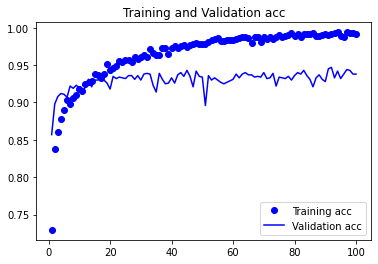

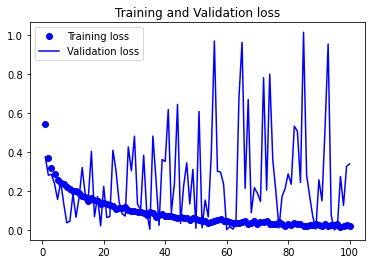

In [21]:
plt.plot(epoches, acc, 'bo', label="Training acc")
plt.plot(epoches, val_acc, 'b', label="Validation acc")
plt.title("Training and Validation acc")
plt.legend()
plt.figure()
plt.plot(epoches, loss, 'bo', label="Training loss")
plt.plot(epoches, val_loss, 'b', label="Validation loss")
plt.title("Training and Validation loss")
plt.legend()
plt.show()